## Real Estate - Price Predictor


In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [6]:
housing['NOX'].value_counts()

NOX
0.538    23
0.713    18
0.437    17
0.871    16
0.624    15
         ..
0.422     1
0.389     1
0.385     1
0.435     1
0.518     1
Name: count, Length: 81, dtype: int64

In [7]:
housing['B'].value_counts()

B
396.90    121
395.24      3
393.74      3
395.58      2
393.23      2
         ... 
392.53      1
394.54      1
394.33      1
303.42      1
50.92       1
Name: count, Length: 357, dtype: int64

In [8]:
housing['AGE'].value_counts()

AGE
100.0    43
87.9      4
97.9      4
98.8      4
96.0      4
         ..
85.9      1
66.6      1
54.2      1
61.1      1
78.9      1
Name: count, Length: 356, dtype: int64

In [9]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
%matplotlib inline

In [11]:
# #for plotting histogram we used 
# import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize=(20,15))

## Train-Test Splitting

In [12]:
#for knowing how ranodm seed works
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    print(shuffled)
    test_set_size=int(len(data)* test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
# train_set, test_set=split_train_test(housing,0.2)

In [14]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set:{len(test_set)}\n")

In [15]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set: 404
Rows in test set:102



In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [17]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 342 to 218
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [18]:
strat_test_set.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.303353,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662996,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Train sets Zero and Test Set Zero 

In [19]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [20]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [21]:
# 95/7

In [22]:
# 376/28

In [23]:
housing=strat_train_set.copy()

## Correlations

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

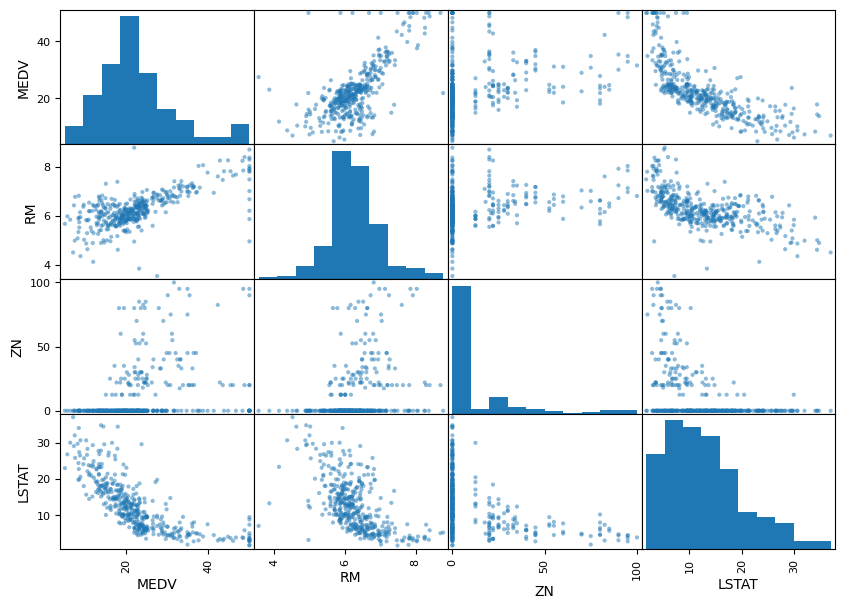

In [24]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(10,7))

<Axes: xlabel='RM', ylabel='MEDV'>

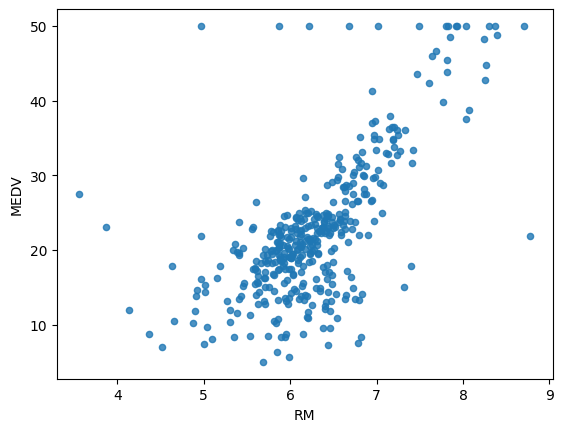

In [25]:
housing.plot(kind="scatter",x="RM", y="MEDV",alpha=0.8)

 ## Attribute Combination 

In [26]:
housing["TAXRM"]=housing["TAX"]/housing["RM"]

In [27]:
housing["TAXRM"]

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [28]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


## Here 1 means Strong Postive Correlations

In [29]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528626
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

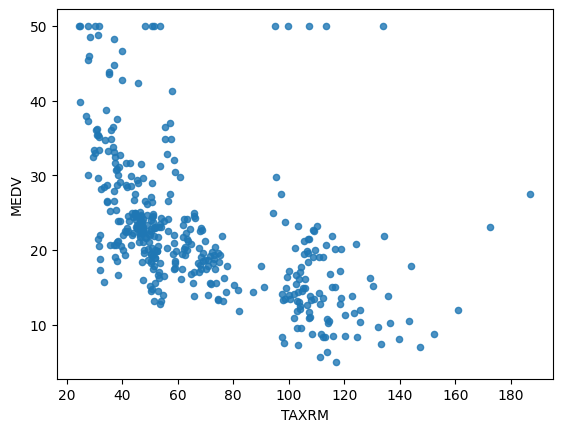

In [30]:
housing.plot(kind="scatter",x="TAXRM", y="MEDV",alpha=0.8)

In [31]:
housing=strat_train_set.drop("MEDV", axis=1)
housing_labels=strat_train_set["MEDV"].copy()
#So much Important Beacuse it can be used as Shortcut way
#with this we drop the TAXRM table using this

## Missing Attributes

In [32]:
a=housing.dropna(subset=["RM"]) #option 1
a.shape

(399, 13)

In [33]:
housing.drop("RM", axis=1).shape

(404, 12)

In [34]:
median=housing["RM"].median()

In [35]:
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [36]:
housing.shape

(404, 13)

In [37]:
housing.describe() #before we started filling missing attributes (Here we have 399 as RM Value)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [38]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [39]:
imputer.statistics_
#these Value are calculated here

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [40]:
imputer.statistics_.shape
#these Value are calculated here

(13,)

In [41]:
X=imputer.transform(housing) #transform data that We wanted to Transform from these Imputers

In [42]:
housing_tr=pd.DataFrame(X,columns=housing.columns) #transformed dataset

In [43]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Are three types Objects:
1. Estimator - It estimates some parameter based on dataset. eg:imputer. It has a fit method and transform method. Fit method - fits dataset and calculates internal parameters. 
2. Transformers - transform method take input from user and print output based on learning from Fit().It also has a convenience function called Fit_Transform() which fits then transforms.
3. Predictors - LinerRegression is best example for Predicitors and Fit() or Predict() are two functions.

## Feature of Scaling

Primiarly two types feature of Scaling methods are:
1.Min-max Scaling (Normalization)
    (Minus(-) from Minimum and divide by (Min-max))
    Sklearn provide Class called MinMaxScaler for using this
2.Standardization Scaling
    minus from mean divide by/std(standard deviation)
    Sklearn provide class called Standard Scaler for this one.


## Started Pipeline 
- Means we do series of steps here also it takes List[ ]

In [44]:
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    my_pipeline=Pipeline([
        ('imputer',SimpleImputer(strategy="median")),('std_scaler', StandardScaler()), 
    ])

In [45]:
housing_num_tr=my_pipeline.fit_transform(housing_tr)

In [46]:
housing_num_tr #numpy array 

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [47]:
housing_num_tr=my_pipeline.fit_transform(housing) #Final Standard Scaler numpy array

In [48]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [49]:
housing_num_tr.shape #15 is last column of this features

(404, 13)

## Selecting a Desired Model for Real Estates

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model=LinearRegression()
# model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)  
#Linear Regression table is fit here as it shows in Output also normalization get False here

RandomForestRegressor()

Here we Change Our LinearRegression Model to DecisionTreeRegressor for better output

Here our Linear Regression model got trained

In [51]:
some_data=housing.iloc[:5]

In [52]:
some_labels=housing_labels.iloc[:5]

In [53]:
prepared_data=my_pipeline.transform(some_data)

Here we predict our model based Data

In [54]:
model.predict(prepared_data)

array([22.415, 25.405, 16.162, 23.279, 23.382])

In [55]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [56]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)

In [57]:
rmse

np.float64(1.2419548049843685)

## Using better evaluation technique - Cross Validation

It needs Utility where Greatness is better

In [58]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [59]:
rmse_scores # better prices for use for MEDV

array([2.83974434, 2.95833633, 4.44355725, 2.61458919, 3.34727447,
       2.63442497, 4.60392742, 3.29235583, 3.22273376, 3.27268721])

In [60]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean: ",scores.mean())
    print("Standard Deviation: ",scores.std())

In [61]:
print_scores(rmse_scores)

Scores: [2.83974434 2.95833633 4.44355725 2.61458919 3.34727447 2.63442497
 4.60392742 3.29235583 3.22273376 3.27268721]
Mean:  3.3229630763546183
Standard Deviation:  0.6521528729119183


Model Outputs

1.Decision Tree:
    Mean:  4.252690928324337
    Standard Deviation:  0.4757539483466233

2.Linear Regression:
    Mean:  4.2866777921560715
    Standard Deviation:  0.6769319012418249

3.RandomForest Regressor:
    Mean:  3.308198449934781
    Standard Deviation:  0.7113153040844279

## Saving the model

In [62]:
from joblib import dump, load
dump(model, 'Real.joblib') 

['Real.joblib']

## Testing the model

In [70]:
X_test=strat_test_set.drop("MEDV",axis=1)
Y_test=strat_test_set["MEDV"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
# print(final_predictions,list(Y_test))

In [67]:
final_rmse

np.float64(2.959322125280799)

In [72]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [73]:
from joblib import dump, load
import numpy as np
model=load('Real.joblib') 
price=np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(price)

array([22.415])